In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

# Learning Objectives

1. Name and recognize the two interfaces to matplotlib
2. Be able to use both interfaces to generate charts
3. Understand the connection between matplotlib and seaborne/pandas
4. Make plots with multiple datasets, and figures
5. Know the recommended functional form for writing your own plotting functions

# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* Seaborn
* **Matplotlib**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applicatione e.g. | too high |

# plt example

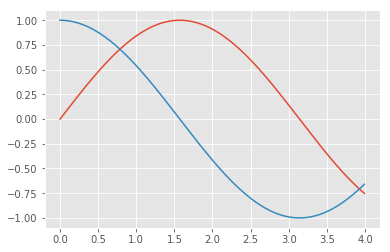

In [2]:
x_data = np.arange(0, 4, .011)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
plt.plot(x_data, np.cos(x_data))
# plt.show() # uncomment this line if you didn't start the notebook with %matplotlib inline

In [3]:
type(plt)

module

In [4]:
type(plt.plot)

function

## Weird

`plt` was imported as a library, but it appears to be keeping some state between the last two lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

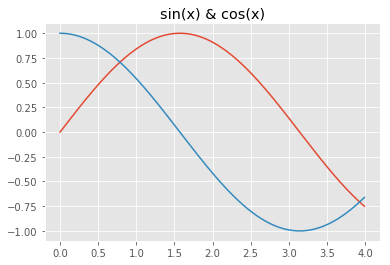

In [5]:
x_data = np.arange(0, 4, .01)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
#We can actually keep adding state here, and it will be 
#reflected when we finally call show.
plt.plot(x_data, np.cos(x_data))
plt.title("sin(x) & cos(x)")

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

# Behind the curtain

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)



In [6]:
plt.figure?

In [7]:
fig = plt.figure()
fig.add_subplot?

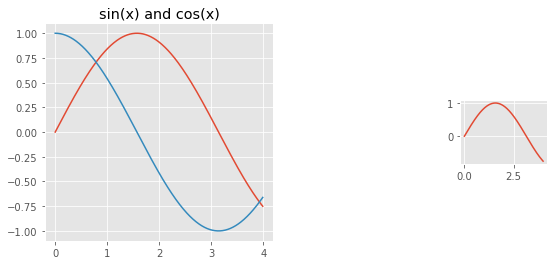

In [8]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(121) #nrows, ncols, plotnumber
ax2 = fig.add_subplot(3, 5, 10)
ax.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
ax.set_title('sin(x) and cos(x)')
ax2.plot(x_data, y_data)
plt.show()

In this example, the fact that state is maintained is less surprising.

# Mix 'n' Match

Turns out, you can combine `plt` and object-oriented approach.

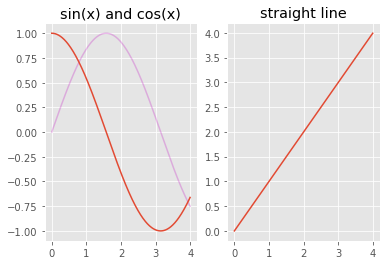

In [9]:
fig = plt.figure()
ax = fig.add_subplot(121)
plt.title('sin(x) and cos(x)')
ax2 = fig.add_subplot(1,2,2)
plt.title('straight line')
ax_ret = ax.plot(x_data, y_data, color='m', alpha=.25)
ax.plot(x_data, np.cos(x_data))
# ax_ret[0].set_alpha(.25) # alternative to using the alpha keyword when calling ax.plot
ax2.plot(x_data, x_data)
plt.show()

In [10]:
ax_ret

In [11]:
ax_ret[0]

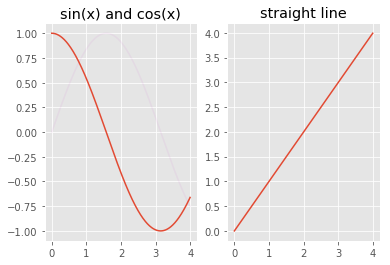

In [12]:

fig = plt.figure()
ax = fig.add_subplot(121)
plt.title('sin(x) and cos(x)')
ax2 = fig.add_subplot(1,2,2)
plt.title('straight line')
ax_ret = ax.plot(x_data, y_data, color='m', alpha=.25)
ax.plot(x_data, np.cos(x_data))
# ax_ret[0].set_alpha(.25) # alternative to using the alpha keyword when calling ax.plot
ax2.plot(x_data, x_data)

line = ax_ret[0]
line.set_alpha(.05)

# Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

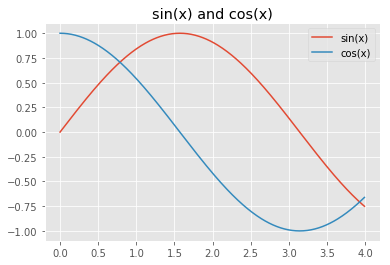

In [13]:
#Layout
fig = plt.figure()
ax = fig.add_subplot(111)
#Plotting
ax.plot(x_data, y_data, label='sin(x)')
ax.plot(x_data, np.cos(x_data), label='cos(x)')
ax.set_title('sin(x) and cos(x)')
ax.legend()

# Multiple plots

/home/moses/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


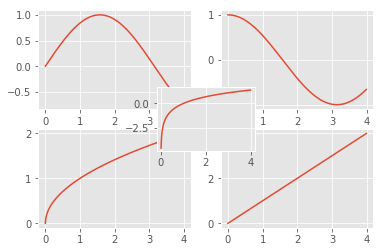

In [14]:
#Layout 2,2 with center pane.
fig, ax_list = plt.subplots(2, 2)
ax = fig.add_subplot(3, 3, 5)
#Draw on axes
y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for subp, y_func in zip(ax_list.flatten(), y_funcs):
    subp.plot(x_data, y_func(x_data))
ax.plot(x_data, np.log(x_data))

In [15]:
ax_list

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe440b8b2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe440d3f208>]], dtype=object)

# What about pandas?

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame({'x':x_data, 'sinx':np.sin(x_data), 'cosx':np.cos(x_data),
                  'rand':np.random.rand(len(x_data))})
df = df.set_index('x')
df.head()

,cosx,rand,sinx
x,,,
0.00,1.00000,0.083441,0.000000
0.01,0.99995,0.322699,0.010000
0.02,0.99980,0.147722,0.019999
0.03,0.99955,0.871735,0.029996
0.04,0.99920,0.696891,0.039989


In [18]:
df.cosx.plot?

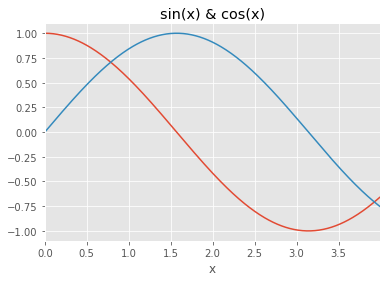

In [19]:
ax = df.cosx.plot()
ax.set_title('sin(x) & cos(x)')
df.sinx.plot()

Calling the plot method on a pandas series returns a familiar matplotlib axes object.

In [20]:
ax

(-1, 1)

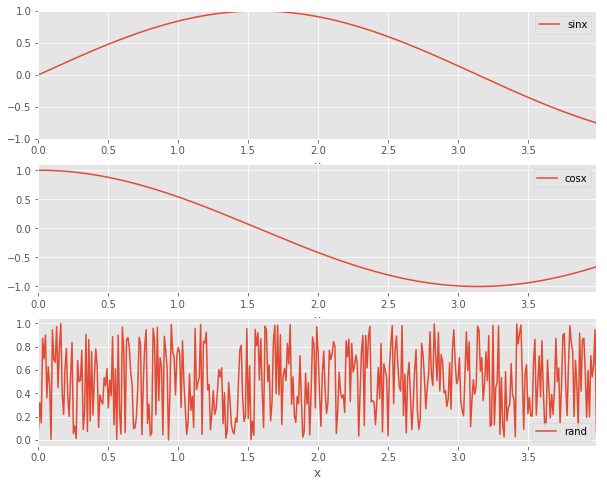

In [21]:
#We can also supply an axes object on which to draw!
fig, ax_list = plt.subplots(3,1, figsize=(10,8))
cols = ['sinx', 'cosx', 'rand']
for ax, col in zip(ax_list, cols):
    df[col].plot(ax=ax)
    ax.legend()
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-1, top=1)

Pandas has some cool plotting methods

In [22]:
df = pd.read_csv('data/winequality-red.csv', sep=';')

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


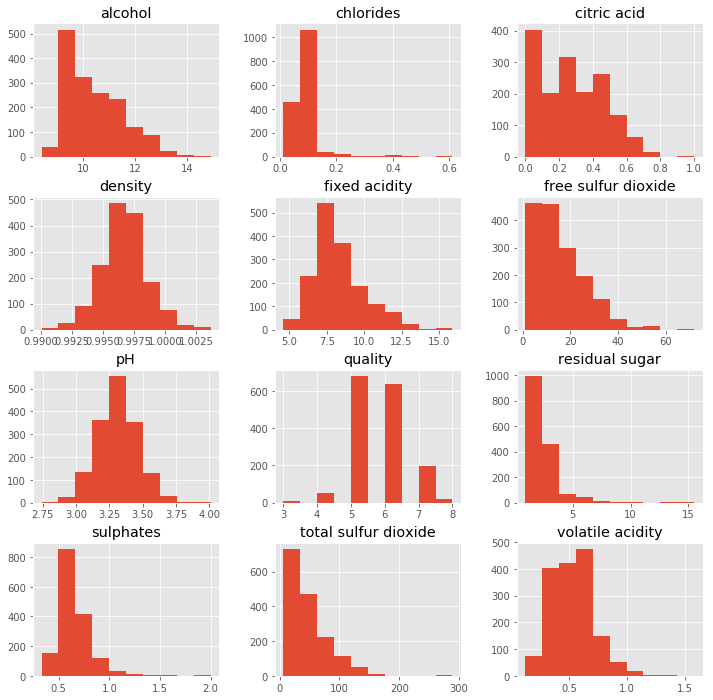

In [24]:
df.hist(figsize=(12,12));

There's a lot going on behind the scenes in that one command.

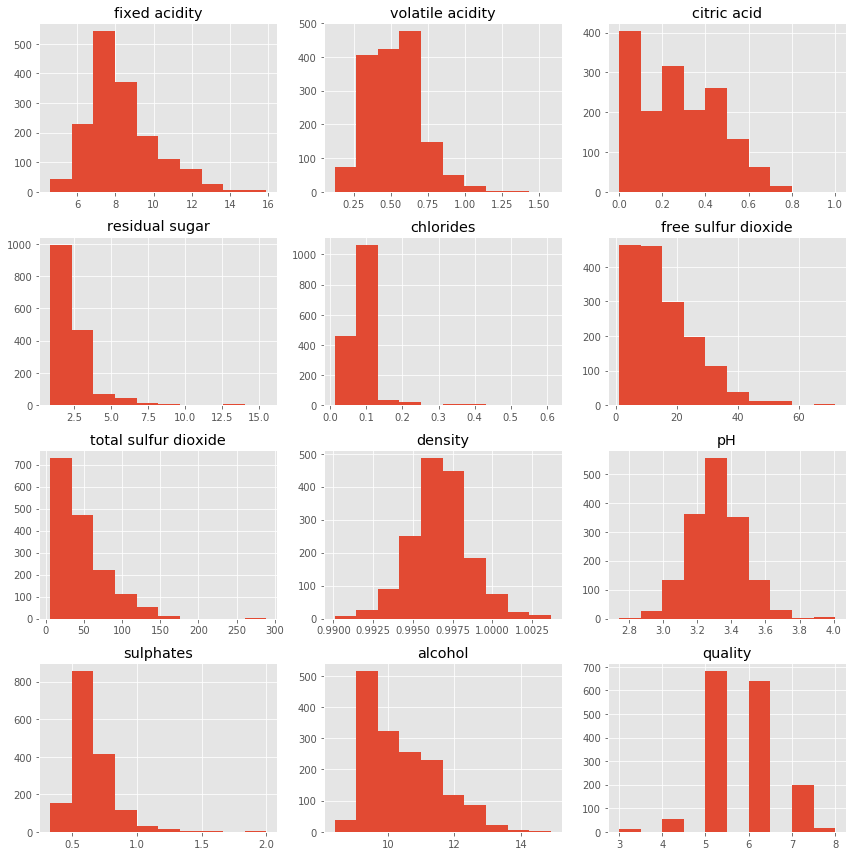

In [25]:
fig, axes = plt.subplots(4,3, figsize=(12,12))
for ax, col in zip(axes.flatten(), df.columns):
    df[col].hist(ax=ax)
    ax.set_title(col)
fig.tight_layout() 

In [26]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe43e83fcc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe43e66f400>]], dtype=object)

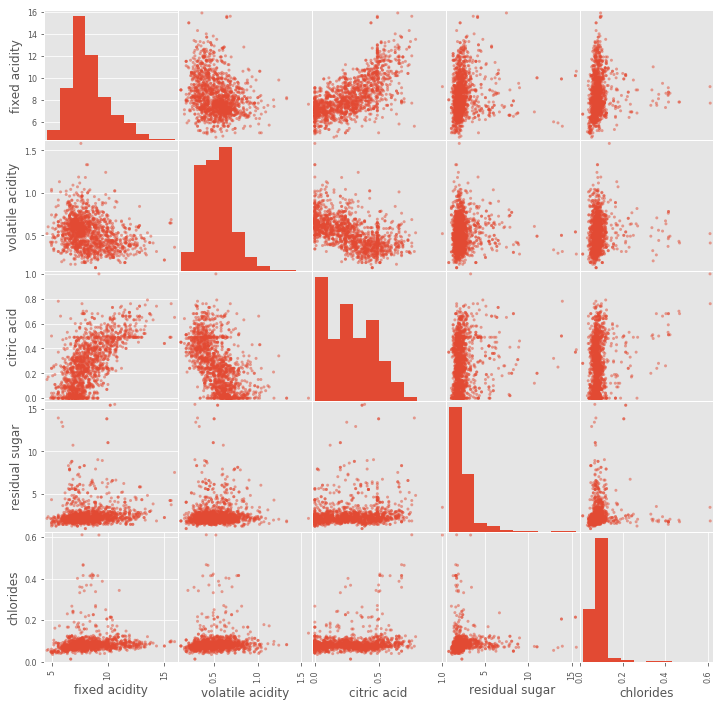

In [27]:
pd.plotting.scatter_matrix(df[df.columns[:5]], figsize=(12,12));

# Writing plotting functions

In [28]:
def our_own(*args, **kwargs):
    print(args, kwargs)
our_own(1,2,3, one=1, two=2)

(1, 2, 3) {'one': 1, 'two': 2}


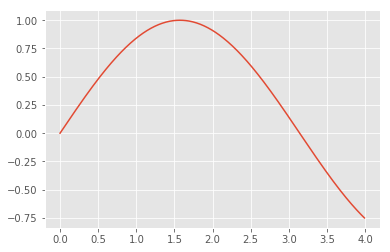

In [29]:
data = (x_data, y_data)
plt.plot(*data)

In [30]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

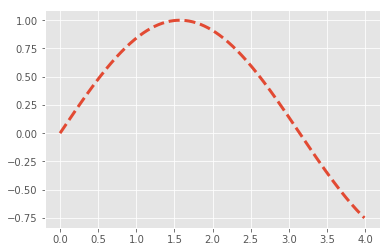

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
out = my_plotter(ax, x_data, y_data, {'linewidth':3, 'linestyle':'--'})

In [32]:
ax

In [33]:
out

# Example:
Let's write a function that draws some data, and some horizontal
lines representing the 25th and 75th percentile.

We'll call it iqr_plot.

### I do: 
a function for drawing a horizontal line at some point.

### We do: 
write the iqr_plot function.

### You do: 
make a 2 by 2 grid of plots using this function.


In [34]:
np.percentile?

In [35]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]

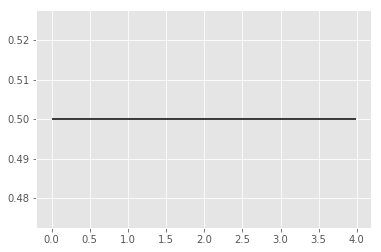

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x_data, .5)
plt.show()

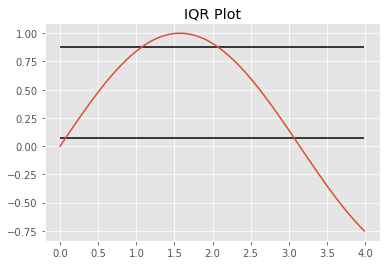

In [37]:
def iqr_plot(ax, x_data, y_data):
    #plot 3 things, 2 horizontal lines, data itself.
    data_line = ax.plot(x_data, y_data)
    pct_75 = np.percentile(y_data, 75)
    pct_25 = np.percentile(y_data, 25)
    upper = horizontal_line(ax, x_data, pct_75)
    lower = horizontal_line(ax, x_data, pct_25)
    return data_line + upper + lower
fig, axes = plt.subplots(1,1)
lines = iqr_plot(axes, x_data, y_data)
axes.set_title("IQR Plot")


In [38]:
lines

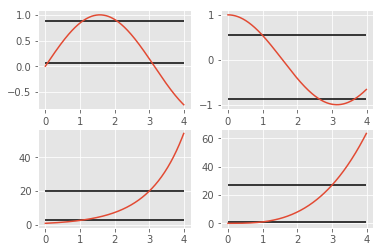

In [39]:
fig, ax_list = plt.subplots(2,2)
Y = [f(x_data) for f in [np.sin, np.cos, np.exp, lambda x: x**3]]
for ax, y_data in zip(ax_list.flatten(), Y):
    iqr_plot(ax, x_data, y_data)